In [1]:
import pandas as pd
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\aurel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\aurel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\aurel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\aurel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\aurel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

Tu vas reprendre ton notebook de la quête précédente, et réaliser 4 WordCloud différents :

Partage le lien vers ton notebook en guise de solution au challenge.


In [2]:
article = "Un bon feuilleton, que l’on apprécie retrouver chaque semaine, doit offrir son lot de suspense et de surprise. Que penser de l’exercice 2023-2024 de la Ligue 1 conclu ce dimanche soir ? Personne n’est tombé de sa chaise en voyant le Paris SG glaner un 12e titre de champion de France. Reste à savoir ce que sera l’an prochain le visage du club le plus puissant de l’Hexagone sans Kylian Mbappé, son meilleur joueur, en partance pour le Real Madrid. Vaste débat. Pour le reste, l’AS Monaco, quatrième budget de France, a profité de la faiblesse, l’indigence ou l’irrégularité (au choix) de ses concurrents directs que sont Marseille, Lyon, ou encore Rennes et Lens, pour signer son retour en Ligue des champions la saison prochaine."

In [10]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

article_1 = tokenizer.tokenize(article.lower())

tokens_clean = []
for words in article_1:
  if words not in nltk.corpus.stopwords.words("french"):
    tokens_clean.append(words)

tokens_clean

['bon',
 'feuilleton',
 'apprécie',
 'retrouver',
 'chaque',
 'semaine',
 'doit',
 'offrir',
 'lot',
 'suspense',
 'surprise',
 'penser',
 'exercice',
 '2023',
 '2024',
 'ligue',
 '1',
 'conclu',
 'dimanche',
 'soir',
 'personne',
 'tombé',
 'chaise',
 'voyant',
 'paris',
 'sg',
 'glaner',
 '12e',
 'titre',
 'champion',
 'france',
 'reste',
 'savoir',
 'an',
 'prochain',
 'visage',
 'club',
 'plus',
 'puissant',
 'hexagone',
 'sans',
 'kylian',
 'mbappé',
 'meilleur',
 'joueur',
 'partance',
 'real',
 'madrid',
 'vaste',
 'débat',
 'reste',
 'monaco',
 'quatrième',
 'budget',
 'france',
 'a',
 'profité',
 'faiblesse',
 'indigence',
 'irrégularité',
 'choix',
 'concurrents',
 'directs',
 'marseille',
 'lyon',
 'encore',
 'rennes',
 'lens',
 'signer',
 'retour',
 'ligue',
 'champions',
 'saison',
 'prochaine']

In [4]:
from nltk.stem import SnowballStemmer

stem_en = SnowballStemmer("french")
sent_stem = [stem_en.stem(word) for word in tokens_clean]
nltk.FreqDist(sent_stem).most_common()[:10]

[('ligu', 2),
 ('champion', 2),
 ('franc', 2),
 ('rest', 2),
 ('prochain', 2),
 ('bon', 1),
 ('feuilleton', 1),
 ('apprec', 1),
 ('retrouv', 1),
 ('chaqu', 1)]

In [5]:
import spacy

nlp = spacy.load("fr_core_news_sm")

text_clean = ""
for words in tokens_clean:
    text_clean += " "
    text_clean += words

sent_tokens = nlp(text_clean)

liste_mots =[]

for token in sent_tokens:
    # print(token)
    liste_mots.append(token.lemma_)

nltk.FreqDist(liste_mots).most_common()[:10]


[('ligue', 2),
 ('champion', 2),
 ('france', 2),
 ('reste', 2),
 ('prochain', 2),
 (' ', 1),
 ('bon', 1),
 ('feuilleton', 1),
 ('apprécier', 1),
 ('retrouver', 1)]


1/ Un WordCloud à partir du texte initial, grâce à la méthode "generate_from_text"

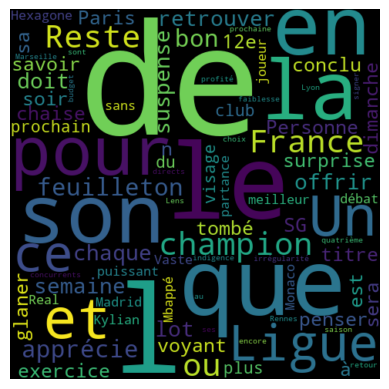

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10)

wordcloud.generate_from_text(article)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


2/ Un WordCloud grâce à la méthode "generate_from_frequencies" après nettoyage des stopwords et de la ponctuation.

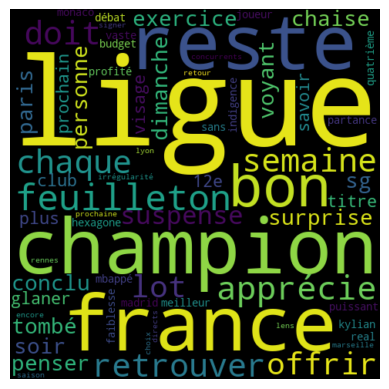

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10)

wordcloud.generate_from_text(text_clean)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


3/ Un WordCloud grâce à la méthode "generate_from_frequencies" après nettoyage des stopwords et de la ponctuation, et application d'un stemmer.

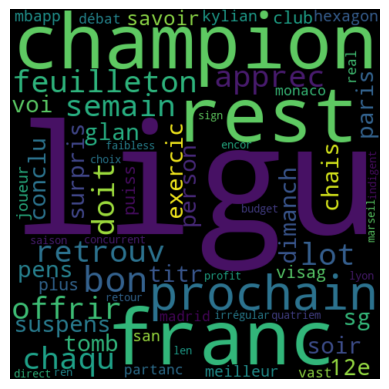

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10)

sent_clean = ""
for words in sent_stem:
    sent_clean += " "
    sent_clean += words

wordcloud.generate_from_text(sent_clean)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


4/ Un WordCloud grâce à la méthode "generate_from_frequencies" après nettoyage des stopwords et de la ponctuation, et application d'un lemmatizer.

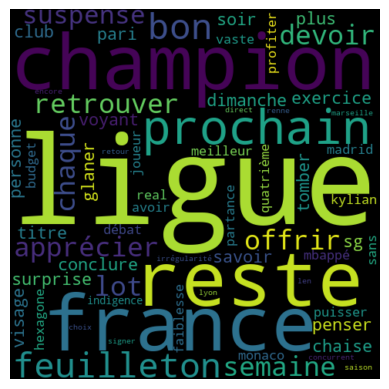

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10)

liste_clean = ""
for words in liste_mots:
    liste_clean += " "
    liste_clean += words

wordcloud.generate_from_text(liste_clean)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()